In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Library Imports Explanation

- `pandas` (`pd`): Used for data manipulation and analysis, especially working with DataFrames and time-series data.
- `matplotlib.pyplot` (`plt`): Used for creating visualizations such as line charts, bar plots, and histograms.
- `numpy` (`np`): Provides numerical operations, arrays, and mathematical functions for efficient computation.


In [107]:
df=pd.read_csv("fear_greed_index.csv")
df1=pd.read_csv("historical_data.csv")

### Loading the Datasets

- `pd.read_csv("fear_greed_index.csv")` loads the Fear & Greed Index data into the DataFrame `df`.
- `pd.read_csv("historical_data.csv")` loads historical trading data into the DataFrame `df1`.

These DataFrames are then used for preprocessing, merging, and further analysis.


In [108]:
print("Fear Greed Index",df.shape)
print("Fear Greed Index Rows:",df.shape[0],"\nFear Greed Index Columns:",df.shape[1])
print("Historical Data",df1.shape)
print("Historical Data Rows:",df1.shape[0],"\nHistorical Data Columns:",df1.shape[1])

Fear Greed Index (2644, 4)
Fear Greed Index Rows: 2644 
Fear Greed Index Columns: 4
Historical Data (211224, 16)
Historical Data Rows: 211224 
Historical Data Columns: 16


### Dataset Shape and Dimensions

This code prints the size and structure of both datasets.

- `df.shape` shows the total number of rows and columns in the **Fear & Greed Index** dataset.
- `df.shape[0]` and `df.shape[1]` separately display the number of rows and columns.
- The same checks are performed for `df1`, the **Historical Data** dataset.

This helps verify dataset sizes before cleaning and analysis.


# Missing Values of Fear Greed Index

In [109]:
print("\nMissing values in Fear Greed Index:")
print(df.isnull().sum())


Missing values in Fear Greed Index:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [110]:
print("\nMissing values in Historical Data:")
print(df1.isnull().sum())



Missing values in Historical Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


# Duplicate Values in Both the Files

In [111]:
print("\nDuplicate rows in Fear Greed Index:", df.duplicated().sum())



Duplicate rows in Fear Greed Index: 0


In [112]:
print("Duplicate rows in Historical Data:", df1.duplicated().sum())


Duplicate rows in Historical Data: 0


In [113]:
df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [114]:
df1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# Part A — Data preparation (must-have)
# Load both datasets and document:
number of rows/columns
missing values / duplicates
Convert timestamps and align the datasets by date (daily level is fine).
Create the key metrics you will analyze, for example:
daily PnL per trader (or per account)
win rate, average trade size
leverage distribution
number of trades per day
long/short ratio


In [115]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = pd.to_datetime(df['date'])
df.to_csv("tables/fear_greed_index.csv", index=False)


This code converts columns into proper datetime format.
The first line converts Unix timestamps (seconds since 1970) into readable date-time values.
The second line converts the date column into pandas datetime objects, enabling easy date-based filtering, comparison, and alignment for time-series analysis.

In [116]:
df.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [117]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], unit='ms')
df1['Date_Only'] = df1['Timestamp'].dt.date
df1['Date_Only'] = pd.to_datetime(df1['Date_Only'])
os.makedirs("tables", exist_ok=True)
df1.to_csv("tables/New_Historical_Data.csv", index=False)

This code converts a millisecond-based Unix timestamp into a readable datetime.
It then extracts only the date part (removing time) using .dt.date.
Finally, the date-only column is converted back to pandas datetime format, making it suitable for date-based merging, grouping, and time-series analysis.

# Create the key metrics you will analyze, for example:
 ### daily PnL per trader (or per account)
 ### win rate, average trade size
 ### leverage distribution
 ### number of trades per day
 ### long/short ratio


In [118]:
merged_df = pd.merge(df, df1, left_on='date', right_on='Date_Only', how='inner')

In [119]:
daily_pnl_per_account = merged_df.groupby(['date', 'Account'])['Closed PnL'].sum().reset_index()
print("Daily PnL per Account:")
daily_pnl_per_account.head()
daily_pnl_per_account.to_csv("tables/daily_pnl_per_account.csv", index=False)

Daily PnL per Account:


This code merges two DataFrames on matching date columns using an inner join.
It then groups the merged data by date and account, calculates the total (sum) of Closed PnL per account per day, resets the index, and displays the first few rows of the result.

In [120]:
total_trades = len(merged_df)
winning_trades = merged_df[merged_df['Closed PnL'] > 0]
num_winning_trades = len(winning_trades)
win_rate = (num_winning_trades / total_trades) * 100 if total_trades > 0 else 0
print(f"\nWin Rate: {win_rate:.2f}%")


Win Rate: 42.04%


This code calculates the trading win rate.
It counts total trades, filters trades with positive Closed PnL as winning trades, and counts them.
The win rate is computed as the percentage of winning trades out of total trades, with a safety check to avoid division by zero.

In [121]:
average_trade_size = merged_df['Size USD'].mean()
print(f"\nAverage Trade Size (USD): {average_trade_size:.2f}")


Average Trade Size (USD): 4780.73


The code below then computes the average trade size by taking the mean of the Size USD column from merged_df and prints it, showing the typical USD value per trade formatted to two decimal places.


In [122]:
long_trades = merged_df[merged_df['Direction'].str.contains('Long', na=False)]
short_trades = merged_df[merged_df['Direction'].str.contains('Short', na=False)]

num_long_trades = len(long_trades)
num_short_trades = len(short_trades)

long_short_ratio = num_long_trades / num_short_trades if num_short_trades > 0 else float('inf')
print(f"\nNumber of Long Trades: {num_long_trades}")
print(f"Number of Short Trades: {num_short_trades}")
print(f"Long/Short Ratio: {long_short_ratio:.8f}")


Number of Long Trades: 90618
Number of Short Trades: 61071
Long/Short Ratio: 1.48381392


This code separates trades into Long and Short based on the Direction column.
It counts each type, then calculates the Long/Short ratio by dividing the number of long trades by short trades.
A safety check prevents division by zero, returning infinity if no short trades exist.

# Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


In [123]:
daily_pnl_accounts = merged_df.groupby(['date', 'Account', 'classification'])['Closed PnL'].sum().reset_index()
daily_pnl_accounts.head()
daily_pnl_accounts.to_csv("tables/daily_pnl_accounts.csv")


This code groups the merged dataset by date, account, and classification.
It then sums the Closed PnL for each group to compute daily profit or loss per account and classification.
Finally, reset_index() converts the grouped result back into a flat DataFrame and displays the first few rows.

In [124]:
sentiment_performance = {}

In [125]:
for sentiment in merged_df['classification'].unique():
    sentiment_df = merged_df[merged_df['classification'] == sentiment]
    sentiment_pnl_accounts = daily_pnl_accounts[daily_pnl_accounts['classification'] == sentiment]
    avg_daily_pnl = sentiment_pnl_accounts['Closed PnL'].mean()
    total_trades_sentiment = len(sentiment_df)
    winning_trades_sentiment = sentiment_df[sentiment_df['Closed PnL'] > 0]
    num_winning_trades_sentiment = len(winning_trades_sentiment)
    win_rate_sentiment = (num_winning_trades_sentiment / total_trades_sentiment) * 100 if total_trades_sentiment > 0 else 0
    negative_daily_pnl = sentiment_pnl_accounts[sentiment_pnl_accounts['Closed PnL'] < 0]['Closed PnL']
    drawdown_proxy = negative_daily_pnl.mean() if not negative_daily_pnl.empty else 0
    sentiment_performance[sentiment] = {
        'Average Daily PnL': avg_daily_pnl,
        'Win Rate (%)': win_rate_sentiment,
        'Drawdown Proxy (Avg Neg Daily PnL)': drawdown_proxy
    }

In [126]:
sentiment_performance_df = pd.DataFrame.from_dict(sentiment_performance, orient='index')
sentiment_performance_df.index.name = 'Market Sentiment'

print("Performance Metrics per Market Sentiment:")
display(sentiment_performance_df)
sentiment_performance_df.to_csv("tables/sentiment_performance.csv")

Performance Metrics per Market Sentiment:


,Average Daily PnL,Win Rate (%),Drawdown Proxy (Avg Neg Daily PnL)
Market Sentiment,,,
Greed,99675.516731,44.647138,-327505.900056
Extreme Greed,35393.098355,49.008905,-6741.743586
Neutral,19842.797260,31.718247,-12405.792354
Fear,209372.662205,41.514592,-39938.069817


### Market Sentiment Performance Analysis

This code analyzes trading performance based on market sentiment (`classification`).

For each sentiment category, it performs the following steps:

- Filters trades belonging to the current sentiment
- Calculates **Average Daily PnL** using summed daily PnL per account
- Computes **Win Rate (%)** as the percentage of trades with positive `Closed PnL`
- Estimates a **Drawdown Proxy** using the average of negative daily PnLs per account

All metrics are stored in a dictionary, converted into a pandas DataFrame, indexed by market sentiment, and displayed for comparison.


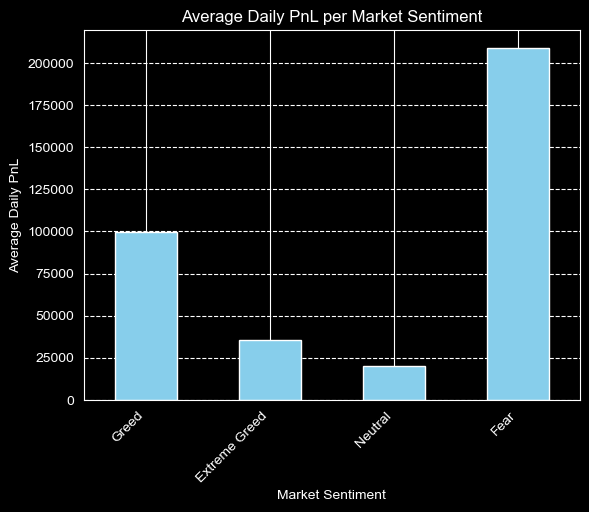

In [127]:
sentiment_performance_df['Average Daily PnL'].plot(kind='bar', color='skyblue')
plt.title('Average Daily PnL per Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Average Daily PnL per Market Sentiment")

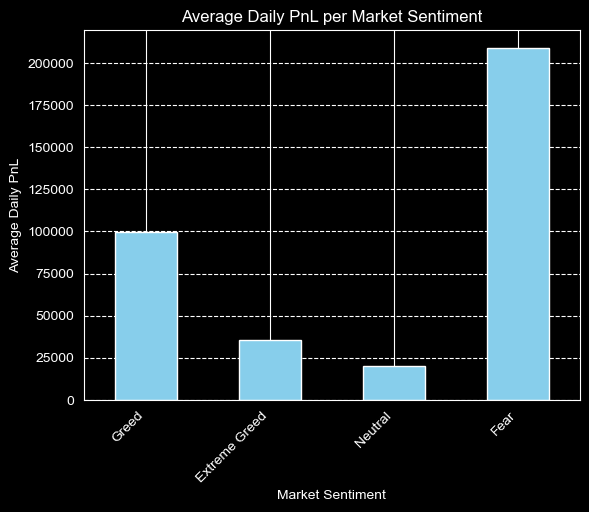

In [128]:
sentiment_performance_df['Average Daily PnL'].plot(kind='bar', color='skyblue')
plt.title('Average Daily PnL per Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Average Daily PnL")

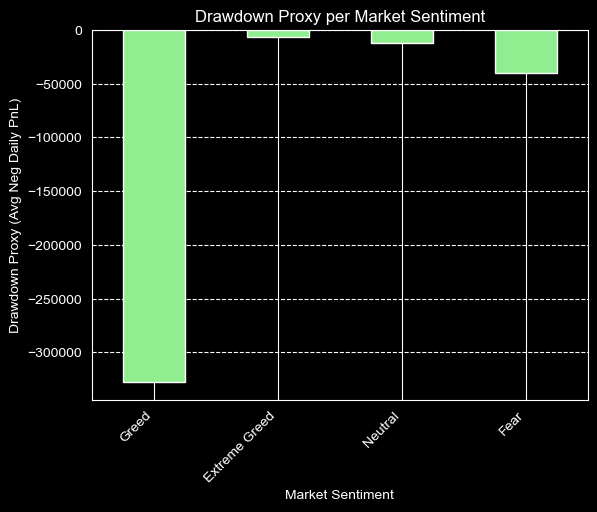

In [129]:
sentiment_performance_df['Drawdown Proxy (Avg Neg Daily PnL)'].plot(kind='bar', color='lightgreen')
plt.title('Drawdown Proxy per Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Drawdown Proxy (Avg Neg Daily PnL)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Drawdown Proxy per Market Sentiment")

# Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?
Identify 2–3 segments


In [130]:
trade_frequency_by_sentiment = merged_df.groupby('classification').size().reset_index(name='Number of Trades')
display(trade_frequency_by_sentiment)
trade_frequency_by_sentiment.to_csv("tables/trade_frequency_by_sentiment.csv")

,classification,Number of Trades
0,Extreme Greed,6962
1,Fear,133871
2,Greed,36289
3,Neutral,7141


### Trade Frequency by Market Sentiment

This code groups the merged trading data by **market sentiment** (`classification`) and counts the number of trades in each category.

- `groupby('classification')` separates trades by sentiment
- `.size()` counts total trades per sentiment
- `reset_index(name='Number of Trades')` converts the result into a clean table

The output shows how frequently trades occur under each market sentiment.


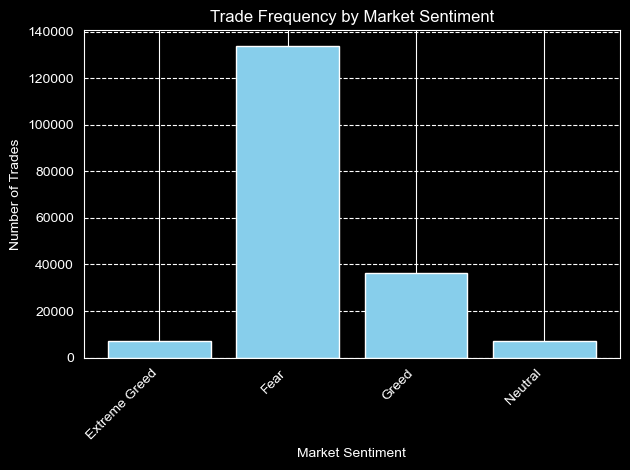

<Figure size 640x480 with 0 Axes>

In [131]:
plt.bar(trade_frequency_by_sentiment['classification'], trade_frequency_by_sentiment['Number of Trades'], color='skyblue')
plt.title('Trade Frequency by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
plt.savefig("Charts/Trade Frequency by Market Sentiment")

In [132]:
long_short_by_sentiment = merged_df.groupby('classification').apply(lambda x: pd.Series({
    'Long Trades': x[x['Direction'].str.contains('Long', na=False)].shape[0],
    'Short Trades': x[x['Direction'].str.contains('Short', na=False)].shape[0]
})).reset_index()

long_short_by_sentiment['Long/Short Ratio'] = long_short_by_sentiment.apply(lambda row:
    row['Long Trades'] / row['Short Trades'] if row['Short Trades'] != 0 else float('inf'), axis=1
)

print("Long/Short Ratio by Market Sentiment:")
display(long_short_by_sentiment)
long_short_by_sentiment.to_csv("tables/long_short_by_sentiment.csv")

Long/Short Ratio by Market Sentiment:


C:\Users\arkam\AppData\Local\Temp\ipykernel_32012\1549215827.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  long_short_by_sentiment = merged_df.groupby('classification').apply(lambda x: pd.Series({


,classification,Long Trades,Short Trades,Long/Short Ratio
0,Extreme Greed,3754,3071,1.222403
1,Fear,74462,43783,1.700706
2,Greed,10596,10027,1.056747
3,Neutral,1806,4190,0.431026


In [133]:
average_trade_size_by_sentiment = merged_df.groupby('classification')['Size USD'].mean().reset_index()
print("Average Trade Size by Market Sentiment (USD):")
display(average_trade_size_by_sentiment)
average_trade_size_by_sentiment.to_csv("tables/average_trade_size_by_sentiment.csv")

Average Trade Size by Market Sentiment (USD):


,classification,Size USD
0,Extreme Greed,5660.265764
1,Fear,5259.977837
2,Greed,3182.883845
3,Neutral,3058.848110


In [134]:
print("Trade Frequency by Sentiment:")
display(trade_frequency_by_sentiment)
trade_frequency_by_sentiment.to_csv("tables/trade_frequency_by_sentiment.csv")
print("\nLong/Short Ratio by Sentiment:")
display(long_short_by_sentiment)
long_short_by_sentiment.to_csv("tables/long_short_by_sentiment.csv")
print("\nAverage Trade Size by Sentiment:")
display(average_trade_size_by_sentiment)
average_trade_size_by_sentiment.to_csv("tables/average_trade_size_by_sentiment.csv")

Trade Frequency by Sentiment:


,classification,Number of Trades
0,Extreme Greed,6962
1,Fear,133871
2,Greed,36289
3,Neutral,7141



Long/Short Ratio by Sentiment:


,classification,Long Trades,Short Trades,Long/Short Ratio
0,Extreme Greed,3754,3071,1.222403
1,Fear,74462,43783,1.700706
2,Greed,10596,10027,1.056747
3,Neutral,1806,4190,0.431026



Average Trade Size by Sentiment:


,classification,Size USD
0,Extreme Greed,5660.265764
1,Fear,5259.977837
2,Greed,3182.883845
3,Neutral,3058.848110


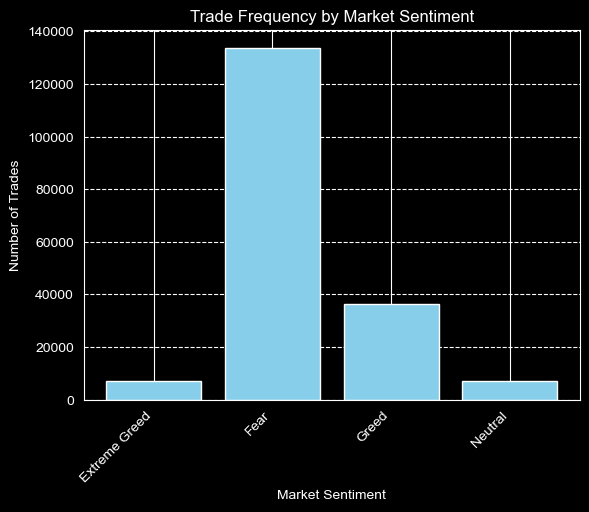

In [135]:
plt.bar(trade_frequency_by_sentiment['classification'], trade_frequency_by_sentiment['Number of Trades'], color='skyblue')
plt.title('Trade Frequency by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Trade Frequency by Sentiment")

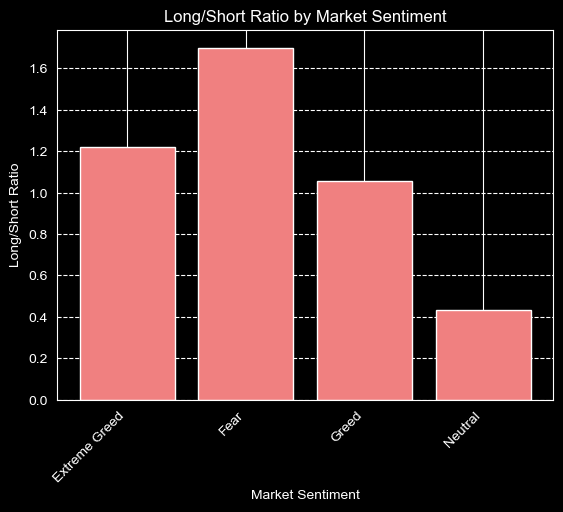

In [136]:
plt.bar(long_short_by_sentiment['classification'], long_short_by_sentiment['Long/Short Ratio'], color='lightcoral')
plt.title('Long/Short Ratio by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Long/Short Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Trade Frequency by Sentiment")

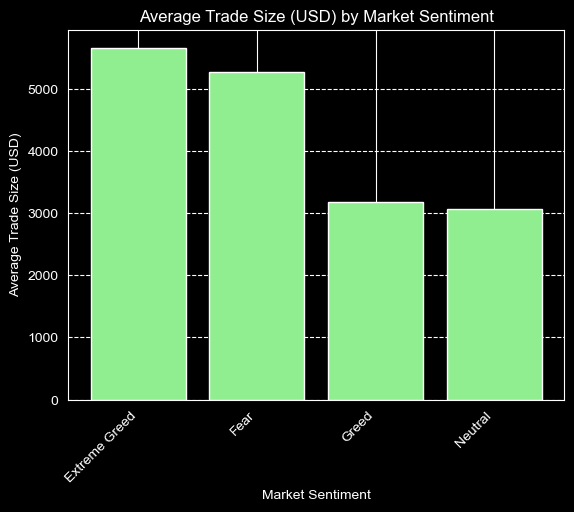

In [137]:
plt.bar(average_trade_size_by_sentiment['classification'], average_trade_size_by_sentiment['Size USD'], color='lightgreen')
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Trade Frequency by Sentiment")

In [138]:
print("Displaying merged_df head:")
display(merged_df.head())

print("\nDisplaying merged_df columns:")
print(merged_df.columns)
merged_df.to_csv("tables/merged_df.csv")

Displaying merged_df head:


,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date_Only
0,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,...,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,2023-03-28
1,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,...,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,2023-03-28
2,2023-03-28 05:30:00,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,...,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00,2023-03-28
3,2023-11-14 05:30:00,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,...,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20,2023-11-14
4,2023-11-14 05:30:00,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,...,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20,2023-11-14



Displaying merged_df columns:
Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date_Only'],
      dtype='object')


In [139]:
trades_per_account = merged_df.groupby('Account').size().reset_index(name='Trade Count')

print("Trades per account head:")
display(trades_per_account.head())
trades_per_account.to_csv("tables/trades_per_account.csv")

Trades per account head:


,Account,Trade Count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853
2,0x271b280974205ca63b716753467d5a371de622ab,1146
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234


In [140]:
print("\nTrade Count distribution:")
display(trades_per_account['Trade Count'].describe())


Trade Count distribution:


count       32.000000
mean      5758.218750
std       7589.402695
min        332.000000
25%       1113.250000
50%       3152.500000
75%       7694.250000
max      36534.000000
Name: Trade Count, dtype: float64

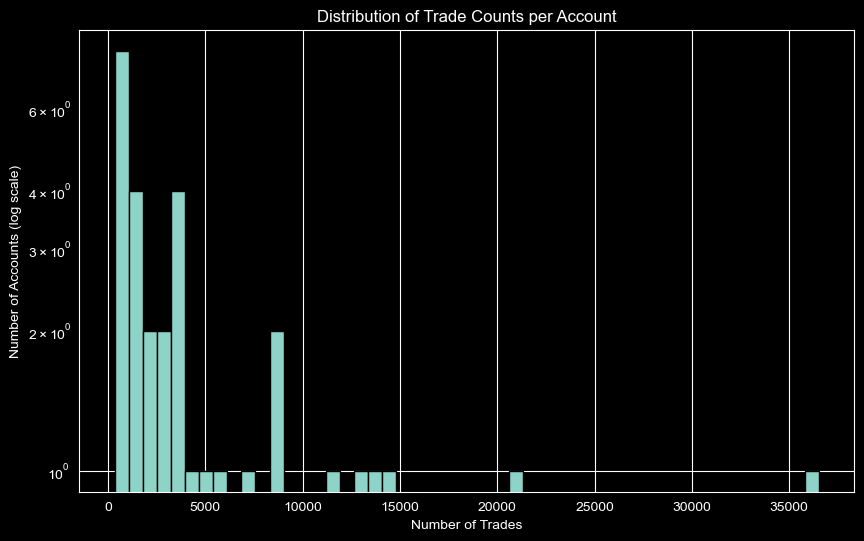

<Figure size 640x480 with 0 Axes>

In [141]:
plt.figure(figsize=(10, 6))
plt.hist(trades_per_account['Trade Count'], bins=50, edgecolor='black', log=True) # Use log scale for better visualization of skewed data
plt.title('Distribution of Trade Counts per Account')
plt.xlabel('Number of Trades')
plt.ylabel('Number of Accounts (log scale)')
plt.grid(True)
plt.show()
plt.savefig("charts/Distribution of Trade Counts per Account")

In [142]:
median_trade_count = trades_per_account['Trade Count'].median()
trades_per_account['Trader Type'] = trades_per_account['Trade Count'].apply(lambda x: 'Frequent' if x >= median_trade_count else 'Infrequent')
print(f"Median Trade Count used for threshold: {median_trade_count}")
display(trades_per_account.head())
merged_df_with_trader_type = pd.merge(merged_df, trades_per_account[['Account', 'Trader Type']], on='Account', how='left')
avg_pnl_by_trader_type = merged_df_with_trader_type.groupby('Trader Type')['Closed PnL'].mean().reset_index(name='Average PnL')
trades_per_account.to_csv("tables/trades_per_account_count.csv")

Median Trade Count used for threshold: 3152.5


,Account,Trade Count,Trader Type
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3853,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,1146,Infrequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3234,Frequent


In [143]:
def calculate_win_rate(group):
    total_trades = len(group)
    winning_trades = group[group['Closed PnL'] > 0]
    num_winning_trades = len(winning_trades)
    return (num_winning_trades / total_trades) * 100 if total_trades > 0 else 0

win_rate_by_trader_type = merged_df_with_trader_type.groupby('Trader Type').apply(calculate_win_rate).reset_index(name='Win Rate (%)')
avg_trade_size_by_trader_type = merged_df_with_trader_type.groupby('Trader Type')['Size USD'].mean().reset_index(name='Average Trade Size (USD)')
trader_performance_summary = avg_pnl_by_trader_type.merge(win_rate_by_trader_type, on='Trader Type')
trader_performance_summary = trader_performance_summary.merge(avg_trade_size_by_trader_type, on='Trader Type')
print("\nTrader Performance Summary by Type:")
display(trader_performance_summary)
trader_performance_summary.to_csv("tables/trader_performance_summary.csv")


Trader Performance Summary by Type:


C:\Users\arkam\AppData\Local\Temp\ipykernel_32012\1585164989.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate_by_trader_type = merged_df_with_trader_type.groupby('Trader Type').apply(calculate_win_rate).reset_index(name='Win Rate (%)')


,Trader Type,Average PnL,Win Rate (%),Average Trade Size (USD)
0,Frequent,47.326965,42.681368,4796.848560
1,Infrequent,122.827046,36.705304,4647.842751


In [144]:
def calculate_win_rate_per_account(group):
    total_trades = len(group)
    winning_trades = group[group['Closed PnL'] > 0]
    num_winning_trades = len(winning_trades)
    return (num_winning_trades / total_trades) * 100 if total_trades > 0 else 0

win_rates_per_account = merged_df.groupby('Account').apply(calculate_win_rate_per_account).reset_index(name='Win Rate (%)')

print("Win Rates per Account head:")
display(win_rates_per_account.head())
win_rates_per_account.to_csv("tables/win_rates_per_account.csv")

Win Rates per Account head:


C:\Users\arkam\AppData\Local\Temp\ipykernel_32012\1761266475.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rates_per_account = merged_df.groupby('Account').apply(calculate_win_rate_per_account).reset_index(name='Win Rate (%)')


,Account,Win Rate (%)
0,0x083384f897ee0f19899168e3b1bec365f52a9012,35.961236
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,44.303140
2,0x271b280974205ca63b716753467d5a371de622ab,43.019197
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,43.811247
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,51.978973


In [145]:
print("\nWin Rate (%) distribution:")
display(win_rates_per_account['Win Rate (%)'].describe())


Win Rate (%) distribution:


count    32.000000
mean     40.987990
std      11.174010
min      23.498695
25%      33.043529
50%      40.707258
75%      45.683005
max      80.934287
Name: Win Rate (%), dtype: float64

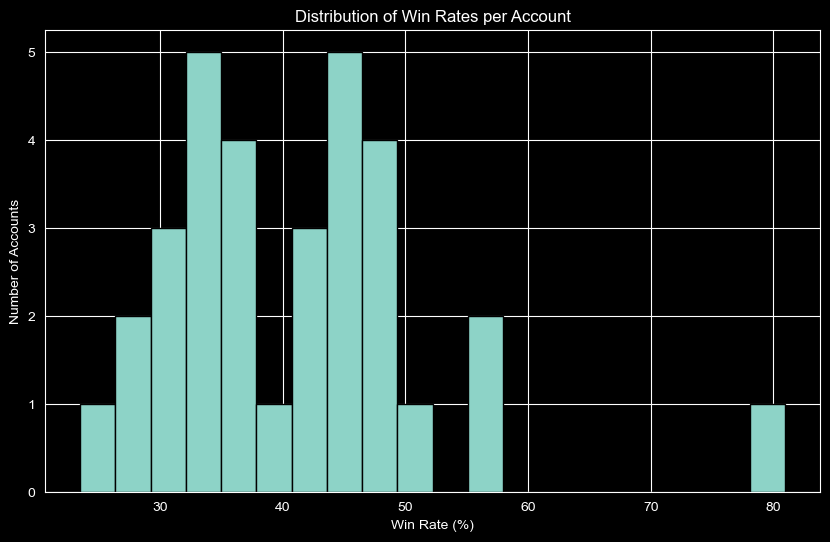

<Figure size 640x480 with 0 Axes>

In [146]:
plt.figure(figsize=(10, 6))
plt.hist(win_rates_per_account['Win Rate (%)'], bins=20, edgecolor='black')
plt.title('Distribution of Win Rates per Account')
plt.xlabel('Win Rate (%)')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.show()
plt.savefig("charts/Distribution of Win Rates per Account")

In [147]:
median_win_rate = win_rates_per_account['Win Rate (%)'].median()
win_rates_per_account['Consistency Type'] = win_rates_per_account['Win Rate (%)'].apply(lambda x: 'Consistent' if x >= median_win_rate else 'Inconsistent')
print(f"Median Win Rate used for threshold: {median_win_rate:.2f}%")
display(win_rates_per_account.head())
win_rates_per_account.to_csv("tables/win_rates_per_account_summary.csv")
merged_df_with_all_types = pd.merge(merged_df_with_trader_type, win_rates_per_account[['Account', 'Consistency Type']], on='Account', how='left')
avg_pnl_by_consistency_type = merged_df_with_all_types.groupby('Consistency Type')['Closed PnL'].mean().reset_index(name='Average PnL')
trade_frequency_by_consistency_type = merged_df_with_all_types.groupby('Consistency Type').size().reset_index(name='Trade Count')
avg_trade_size_by_consistency_type = merged_df_with_all_types.groupby('Consistency Type')['Size USD'].mean().reset_index(name='Average Trade Size (USD)')
consistency_performance_summary = avg_pnl_by_consistency_type \
    .merge(trade_frequency_by_consistency_type, on='Consistency Type') \
    .merge(avg_trade_size_by_consistency_type, on='Consistency Type')

print("\nTrader Performance Summary by Consistency Type:")
display(consistency_performance_summary)
consistency_performance_summary.to_csv("tables/consistency_performance_summary.csv")

Median Win Rate used for threshold: 40.71%


,Account,Win Rate (%),Consistency Type
0,0x083384f897ee0f19899168e3b1bec365f52a9012,35.961236,Inconsistent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,44.303140,Consistent
2,0x271b280974205ca63b716753467d5a371de622ab,43.019197,Consistent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,43.811247,Consistent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,51.978973,Consistent



Trader Performance Summary by Consistency Type:


,Consistency Type,Average PnL,Trade Count,Average Trade Size (USD)
0,Consistent,41.837094,102825,3558.544630
1,Inconsistent,72.734478,81438,6323.888331



# 1. Average PnL for Frequent vs Infrequent Traders

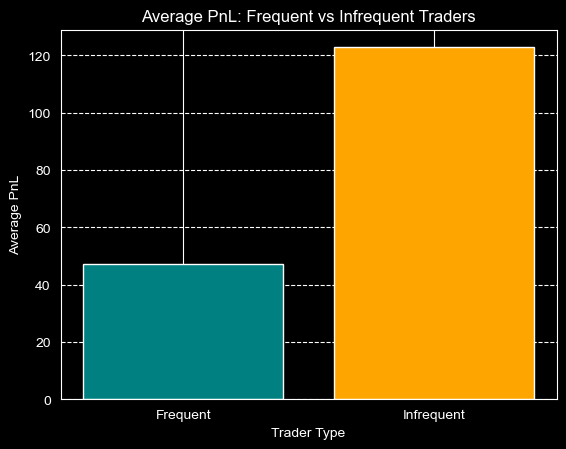

In [148]:
plt.bar(trader_performance_summary['Trader Type'], trader_performance_summary['Average PnL'], color=['teal', 'orange'])
plt.title('Average PnL: Frequent vs Infrequent Traders')
plt.xlabel('Trader Type')
plt.ylabel('Average PnL')
plt.grid(axis='y', linestyle='--')
plt.savefig("Charts/Consistency Performance Summary by Trader Type")

# 2. Win Rate (%) for Frequent vs Infrequent Traders

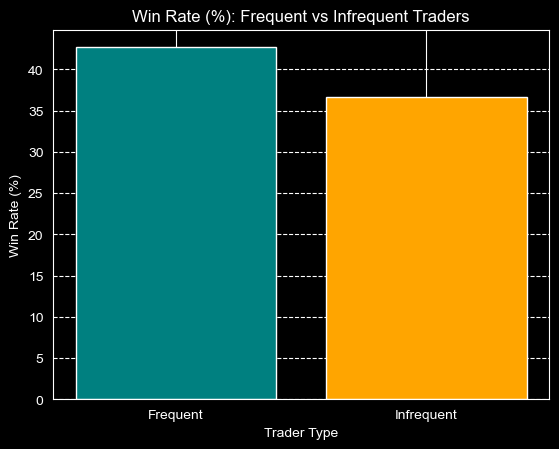

In [149]:
plt.bar(trader_performance_summary['Trader Type'], trader_performance_summary['Win Rate (%)'], color=['teal', 'orange'])
plt.title('Win Rate (%): Frequent vs Infrequent Traders')
plt.xlabel('Trader Type')
plt.ylabel('Win Rate (%)')
plt.grid(axis='y', linestyle='--')
plt.savefig("charts/Win Rate  Frequent vs Infrequent Traders")

# 3. Average Trade Size (USD) for Frequent vs Infrequent Traders


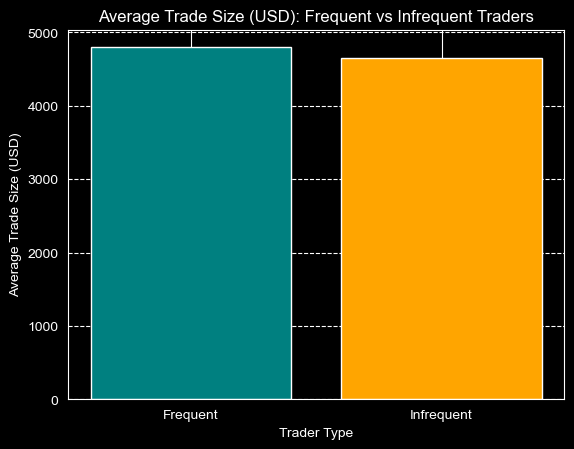

In [150]:
plt.bar(trader_performance_summary['Trader Type'], trader_performance_summary['Average Trade Size (USD)'], color=['teal', 'orange'])
plt.title('Average Trade Size (USD): Frequent vs Infrequent Traders')
plt.xlabel('Trader Type')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y', linestyle='--')
plt.savefig("charts/Average Trade Size vs Inconsistent Traders")

# 4. Average PnL for Consistent vs Inconsistent Traders


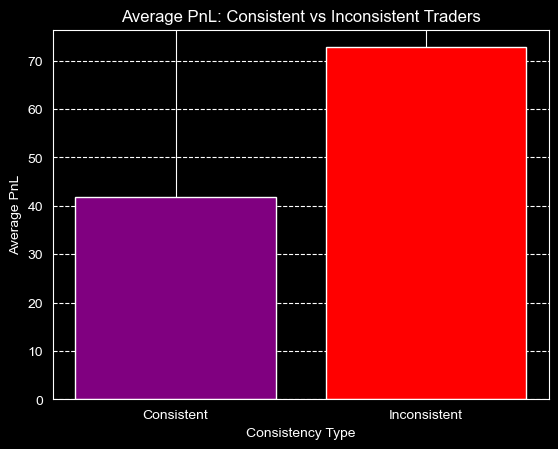

In [151]:
plt.bar(consistency_performance_summary['Consistency Type'], consistency_performance_summary['Average PnL'], color=['purple', 'red'])
plt.title('Average PnL: Consistent vs Inconsistent Traders')
plt.xlabel('Consistency Type')
plt.ylabel('Average PnL')
plt.grid(axis='y', linestyle='--')
plt.savefig("Average PnL for Consistent vs Inconsistent Traders")
plt.savefig("charts/Average PnL for Consistent vs Inconsistent Traders")

# 5. Trade Frequency for Consistent vs Inconsistent Traders

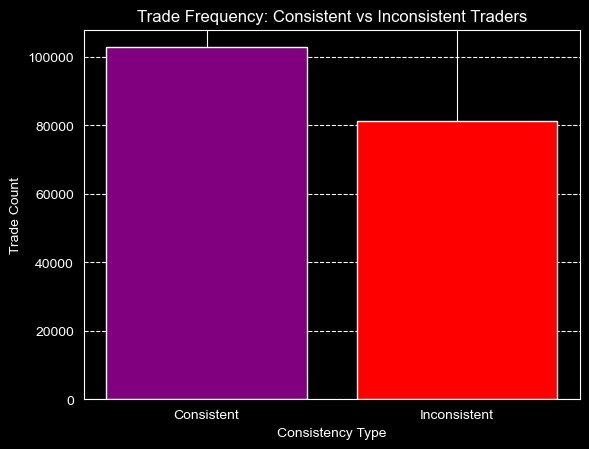

In [152]:
plt.bar(consistency_performance_summary['Consistency Type'], consistency_performance_summary['Trade Count'], color=['purple', 'red'])
plt.title('Trade Frequency: Consistent vs Inconsistent Traders')
plt.xlabel('Consistency Type')
plt.ylabel('Trade Count')
plt.grid(axis='y', linestyle='--')
plt.savefig("charts/Trade Frequency for Consistent vs Inconsistent Traders")

# 6. Average Trade Size (USD) for Consistent vs Inconsistent Traders

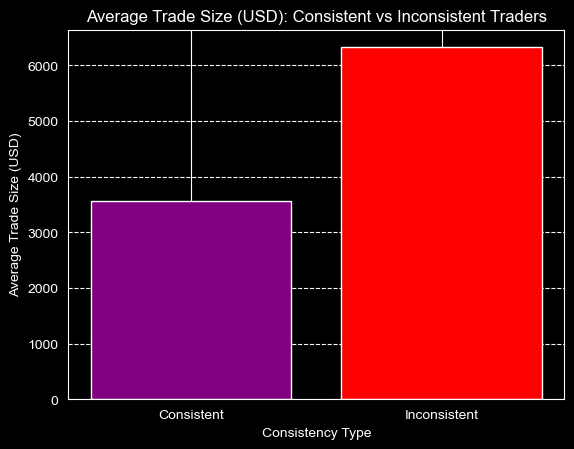

In [153]:
plt.bar(consistency_performance_summary['Consistency Type'], consistency_performance_summary['Average Trade Size (USD)'], color=['purple', 'red'])
plt.title('Average Trade Size (USD): Consistent vs Inconsistent Traders')
plt.xlabel('Consistency Type')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y', linestyle='--')
plt.savefig("charts/Average Trade Size (USD) for Consistent vs Inconsistent Traders")

# Part C — “Actionable output” (must-have)
Propose 2 strategy ideas or “rules of thumb” based on your findings.
Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”


## Trading Strategy Insights Based on Market Sentiment

### 1. Exploiting Market Fear with Controlled Risk
**(The “Fearful Accumulator” Advantage)**

**Insight:**
Trading days marked by **Fear** delivered the highest average daily PnL along with increased trading activity and a strong long-side bias. This indicates that fearful markets often create price dislocations and rebound opportunities, making them attractive for profit generation.

**Rule of Thumb:**
When the Fear & Greed Index signals **Fear**, traders may adopt a more aggressive, long-oriented strategy by increasing trade frequency or position size. However, as downside risk is also elevated, disciplined risk management is critical. Use tighter stop-losses, scaled entries, and risk-adjusted position sizing to control potential losses.

---

### 2. Targeting Stability in Extreme Greed Environments
**(The “Consistent but Cautious” Method)**

**Insight:**
**Extreme Greed** periods showed the highest win rates and the lowest average daily losses. This suggests a market environment favoring consistency, lower volatility, and steady returns rather than large price swings.

**Rule of Thumb:**
During Extreme Greed conditions, prioritize high-confidence setups aimed at smaller but more reliable profits. Strategies with strong win rates and minimal drawdowns are better suited for gradual, stable portfolio growth, even if total returns are lower than in fearful markets.

---

### Leverage Consideration

These insights do not account for **leverage usage**, as leverage data was unavailable. Since leverage can significantly amplify both gains and losses, incorporating leverage metrics would be essential to further refine, validate, and stress-test these trading strategies.
